# Parte 1: Analisi e manipolazione dei dati con Pandas
Pandas è una libreria Python appositamente sviluppata per l'analisi e la manipolazione dei dati, in questo Notebook vedremo insieme come utilizzarla con un dataset reale.<br>
Importiamo pandas con l'alias pd.

In [ ]:
import pandas as pd

### Caricamento del dataset
Per questi esempi e futuri esempi si fara riferimento a:

1.   Iris Dataset, basato sulle caratteristiche dei fiori e della loro suddivisione in famiglie. Per riferirci a un problema di classificazione;

2.   Boston Housing Dataset, valore delle abitazioni nella zona di Boston in base alle carattestiche del quartiere e casa. Per riferirci a un problema di regressone.

Quanto svolto in questa sessione è riferito a Iris, ma può essere fatto anche per il boston dataset come esercizio.
<br>
<br>
Pandas può caricare un dataset da diversi formati all'interno di una speciale struttura dati tabulare chiamata DataFrame.

Vediamo ora come funziona il caricamente tramite file cvs, che DEVE essere caricato manualmente su Google Colab. Fare riferimento al file dentro la cartella Risorse di questo modulo.

In [ ]:
iris = pd.read_csv("iris.csv")
iris.head() #mostra le prime 5 entry del dataset
#iris.head(10) #mostra le prima 10 entry del dataset
#iris.tail() #mostra le ultime 5 entry del dataset

(150, 5)

Il metodo read rileva automaticamente i nomi delle features, se questi sono specificati nella prima riga del file, e il carattere separatore (la virgola per un file CSV).
Possiamo sovrascrivere questi attributi utilizzando i parametri header, names e sep:
* **header**: Indica da quale riga del file trarre i nomi delle features
* **names**: Possiamo utilizzarlo per definire manualmente i nomi delle proprietà tramite un dizionario
* **sep**: Indica il carattere che separa le features all'interno del file.

In [ ]:
iris = pd.read_csv("iris_noheader.csv", sep=",", header=None, names=["sepal_length","sepal_width","petal_length","petal_width","species"])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Il risultato è lo stesso, solo che stavolta abbiamo definito il carattere separatore ed i nomi delle features manualmente.

Per vedere l'elenco delle features possiamo usare l'attributo columns

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Utilizzando il metodo info possiamo ottenere una serie di informazioni sul DataFrame e sui tipi di dati di ogni colonna

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Dataframe e Series

Possiamo accedere ai valori di una singola colonna utilizzando il nome come chiave, il risultato sarà un'altra struttura dati di pandas chiamata Series, utilizzata per immagazzinare array monodimensiali. Un DataFrame è composto da diverse colonne di Series.

In [ ]:
Y = iris['species'] #usiamo [:10] per limitare la visualizzazione alle prime 10 abitazioni
print(type(Y))
Y.head()

<class 'pandas.core.series.Series'>


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Possiamo fare la stessa cosa con un array di chiavi, in questo caso il risultato sarà sempre un DataFrame, è possibile distinguere DataFrame da Series guardando alla presenza di un header.

In [ ]:
X = iris[["sepal_length","sepal_width","petal_length","petal_width"]] 
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In quest'ultimo esempio abbiamo escluso solamente la colonna con la specie, un modo migliore di farlo sarebbe stato utilizzare l'attributo drop.

In [ ]:
X = iris.drop('species',axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**NOTA BENE** il parametro axis=1 indica di eseguire il drop lungo le colonne, che ha senso dato che vogiamo rimuovere una features.

### Selezione e modifica dei dati

Per effettuare lo slicing dei dati, ovver selezionare solo alcune righe e/o colonne di un Dataframe o Series puoi utilizzare i metodo loc o iloc. 
In passato veniva utilizzato anche il metodo ix, ma è stato deprecato a partire dalla versione 0.20 di Pandas.<br>
Le selezioni con loc vengono utilizzate con i label.

In [ ]:
iris.loc[10] #seleziona la riga con l'indice 10 del dataset

sepal_length       5.4
sepal_width        3.7
petal_length       1.5
petal_width        0.2
species         setosa
Name: 10, dtype: object

In [ ]:
iris.loc[:5,'petal_length'] #  Seleziona il petal_length dei primi 5 esempi

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
5    1.7
Name: petal_length, dtype: float64

Le selezioni con iloc vengono fatte con gli indici.

In [ ]:
iris.iloc[10] #seleziona la riga alla posizione 10

sepal_length       5.4
sepal_width        3.7
petal_length       1.5
petal_width        0.2
species         setosa
Name: 10, dtype: object

In [ ]:
iris.iloc[:5,2] # Seleziona il petal_length dei primi 5 esempi (petal_length corrisponde all'indice 2)

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal_length, dtype: float64

**NOTA BENE** Gli indici di loc corrispondo agli indici definiti nel DataFrame, mentre gli indici di iloc corrispondono alla posizione di un elemento nel DataFrame.
Per comprendere meglio questo concetto proviamo a mescolare i primi DataFrame utilizzando il metodo sample

In [ ]:
iris_sampled = iris.sample(frac=1, random_state=0) #con il parametro frac=1 mescoliamo l'intero DataFrame, per mescolare solo n valori utilizzare il parametro n
iris_sampled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


L'indice della prima riga è 114, quindi per ottenerla tramite loc dobbiamo usare l'indice 114.

In [ ]:
iris_sampled.loc[114]

sepal_length          5.8
sepal_width           2.8
petal_length          5.1
petal_width           2.4
species         virginica
Name: 114, dtype: object

Mentre, trovandosi alla posizione 0 del DataFrame, per ottenerla tramite iloc dobbiamo usare l'indice 0

In [ ]:
iris_sampled.iloc[0]

sepal_length          5.8
sepal_width           2.8
petal_length          5.1
petal_width           2.4
species         virginica
Name: 114, dtype: object

Possiamo utilizzare loc ed iloc anche per modificare righe, colonne o valori singoli.

In [ ]:
iris_copy = iris.copy() #Utilizziamo copy per non modificare il DataFrame originale
iris_copy.loc[:5,'petal_length'] = 0 #Impostiamo a 0 i valori della lunghezza dei petali per le osservazioni dall'indice 0 al 5
iris_copy.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,0.0,0.2,setosa
1,4.9,3.0,0.0,0.2,setosa
2,4.7,3.2,0.0,0.2,setosa
3,4.6,3.1,0.0,0.2,setosa
4,5.0,3.6,0.0,0.2,setosa
5,5.4,3.9,0.0,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Statistiche sui dati

Con l'attributo shape possiamo accedere alla dimensione del dataset.

In [ ]:
iris.shape

(150, 5)

Con il metodo describe possiamo ottenere alcune informazioni statistiche sul DataFrame

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Possiamo ottenere le precedenti informazioni ed altre anche singolarmente utilizzando i metodi, sia sull'intero dataset che su una singola colonna.

In [ ]:
print("Massima lunghezza del petalo")
print (iris['petal_length'].max())
print("Minima lunghezza del petalo")
print (iris['petal_length'].min())
print("Lunghezza del petalo media")
print (iris['petal_length'].mean())
print("Mediana della lunghezza del petalo")
print (iris['petal_length'].median())
print("Varianza della lunghezza del petalo")
print (iris['petal_length'].var())
print("Deviazione standard della lunghezza del petalo")
print (iris['petal_length'].std())

Massima lunghezza del petalo
6.9
Minima lunghezza del petalo
1.0
Lunghezza del petalo media
3.7586666666666693
Mediana della lunghezza del petalo
4.35
Varianza della lunghezza del petalo
3.1131794183445156
Deviazione standard della lunghezza del petalo
1.7644204199522617


Come abbiamo visto la colonna *species* è composta da variabili categoriche non numeriche, che rappresentano le classi di appartenenza, per vedere quali sono le classi possiamo usere l'attributo unique sulla colonna.

In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Maschere e Filtri

Pandas da la possibilità di creare filtri sui dati applicando delle maschere ad un Dataframe.
Una maschera è un vettore di variabili booleane che funge da indicatore di quali righe selezionare e quali scartare.
Creare una maschera è semplicissimo.

In [ ]:
long_petal_mask = iris['petal_length'] > iris['petal_length'].mean() #creiamo una maschera per selezionare solo le osservazioni i cui petali sono più lunghi della media
iris_long_petals = iris[long_petal_mask] #applichiamo la maschera al dataframe e creiamo un nuovo dataframe
iris_long_petals.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


Possiamo usare le maschere anche per fare modifiche ai dati basate su condizioni.


In [ ]:
iris_copy = iris.copy() #Utilizziamo copy per non modificare il DataFrame originale
setosa_mask = iris['species'] ==  'setosa' #creiamo una maschera per selezionare solo le osservazioni che appartengono alla specie setosa
iris_copy.loc[setosa_mask,'species'] = "undefined" # utilizziamo loc per applicare la maschera e sostituire la specie versicolor con undefined
iris_copy['species'].unique()

array(['undefined', 'versicolor', 'virginica'], dtype=object)

**NOTA BENE**
Utilizziamo *iris.copy()* per creare una copia del DataFrame, se avessimo utilizzato *iris_copy = iris* avremmo assegnato a iris_copy un riferimento al DataFrame iris, questo vuol dire che ogni modifica a iris_copy sarebbe stata apportata anche a iris.

### Visualizzazioni
Possiamo servirci di matplotlib per creare grafici e visualizzazioni in maniera semplice utilizzando DataFrame e Series.
Costruiamo un grafico di dispersione (scatter plot) che mostra la relazione tra lunghezza del sepalo e larghezza del petalo

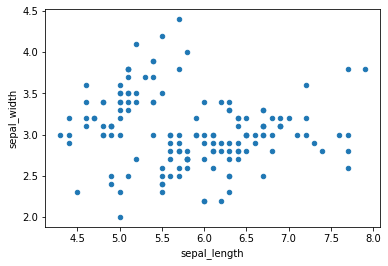

In [ ]:
import matplotlib.pyplot as plt

"""
l'istruzione che segue indica a jupyter
di visualizzare il grafico all'interno del Notebook
"""
%matplotlib inline

iris_2feats = iris[['sepal_length','sepal_width']]
iris_2feats.plot(kind="scatter", x='sepal_length',y='sepal_width')

### Operazioni sul dataset
E' possibile eseguire operazioni aritmetiche sul dataset. Eseguiamo una normalizzazione del dataset

In [ ]:
X = iris.drop('species',axis=1)
X_norm = (X - X.min())/(X.max()-X.min())  
X_norm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


Utilizzando il metodo sort_values possiamo ordinare il dataframe in base al valore di una colonna.

In [ ]:
"""
ordiniamo il dataframe in base alla lunghezza dei petali in maniera ascendente,
per effetturare un ordinamento discendente bisogna utilizzare il parametro ascending = False
"""

iris.sort_values('petal_length').head()
                                      

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa


Possiamo raggruppare un DataFrame per determinati valori o condizioni utilizzando il metodo groupby

In [ ]:
grouped_species = iris.groupby(['species']) # Eseguiamo un raggruppamento per specie
grouped_species.mean() # Mostriamo la media delle features per ogni specie 

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Un problema tipico è quello di avere valori numerici invalidi o mancanti all'interno di un dataset. Utilizzando pandas è possibile correggere facilmente questo problema.
Per prima cosa creiamo casualmente dieci valori non valido all'interno del DataFrame.

In [ ]:
import numpy as np

iris_nan = iris.copy()  #Utilizziamo copy per non modificare il DataFrame originale

max_val = iris.shape[0]
samples = np.random.randint(max_val, size=(10)) #Creiamo un vettore di 10 numeri casuali tra 0 ed il numero di osservazioni

iris_nan.loc[samples,'petal_length']=None #Sostituiamo il valore di "petal_length" per ognuna delle 10 osservazioni con un valore non valido

iris_nan['petal_length'].isnull().sum() #contiamo il numero di valori non validi all'interno della colonna "petal_legnth"

10

Adesso il nostro DataFrame presenta 10 valori non validi per la lunghezza del petalo, correggiamo l'errore rimpiazzandoli con la lunghezza media del petalo utilizzando il metodo fillna

In [ ]:
mean_petal_length = iris_nan['petal_length'].mean()
iris_nan['petal_length'].fillna(mean_petal_length,inplace=True)
iris_nan['petal_length'].isnull().sum() #verifichiamo che la colonna petal_length non contenga più valori non validi.

0

E' possibile effetturae operazioni su righe e colonne utilizzando il metodo apply. Il primo argomento deve essere la funzione da applicare, che può essere una funzione python, una funzione definita dall'utente o una funzione di una libreria esterna.

In [ ]:
iris.apply(np.count_nonzero, axis=1).head() # contiamo i valori differenti da zero per riga

0    5
1    5
2    5
3    5
4    5
dtype: int64

In [ ]:
iris.apply(np.count_nonzero, axis=0).head() # contiamo i valori differenti da zerp per colonna

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

**NOTA BENE**: Non modificare che il metodo apply non modifica il DataFrame originale, ma ritorna un DataFrame modificato, quindi per modificare il DataFrame 

Per applicare una funzione elemento per elemento possiamo usare il metodo applymap

In [ ]:
X = iris.drop('species',axis=1)
X = X.applymap(lambda val:int(round(val,0)))# Arrotondiamo i valori all'intero più vicino
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5,4,1,0
1,5,3,1,0
2,5,3,1,0
3,5,3,2,0
4,5,4,1,0


# Parte 2 Gestire dati mancanti
L'operare su dataset in cui alcuni valori sono mancanti è un problema tipico del data preprocessing.
Vediamo alcuni metodi da applicare in questo caso, cominciamo importando le librerie che utilizzeremo.<br>
Importiamo anche la libreria numpy per vedere come gestire i dataset da vettori 

In [ ]:
import numpy as np

## Creiamo il nostro dataset con valori mancanti
Vediamo ora come caricare i dataset anche direttamente da una risorsa online, in questo caso il vantaggio e di non aver bisogno di caricare/avere il file in locale<br>
Carichiamo il dataset in un DataFrame.

In [ ]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                   names=["sepal_length","sepal_width","petal_length","petal_width","class"])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Il Dataset Iris non presenta dati mancanti quindi li genereremo noi, ricordiamo però che solitamente non è cosi semplice e qui ci limitiamo a vedere una risoluzione del problema di base.


In [ ]:
# Creiamo il Dataframe che voglio sporcare
iris_nan = iris.copy()

#Creiamo un vettore di 10 numeri casuali tra 0 e il numero di osservazioni
samples = np.random.randint(iris.shape[0], size=(10)) 

#Sostituiamo il valore di "petal_length" per ognuna delle 10 osservazioni con un valore non valido
iris_nan.loc[samples,'petal_length']=None 

#contiamo il numero di valori non validi all'interno della colonna "petal_legnth"
nan_count = iris_nan['petal_length'].isnull().sum() 
print("Il dataset ha "+str(nan_count)+" valori mancanti")

# salviamo il dataset così creato all'interno di un file CSV
iris_nan.to_csv("iris_with_nan.csv") 

Il dataset ha 10 valori mancanti


Utilizziamo il DataFrame per caricare il dataset anche in un array numpy

In [ ]:
Y = iris_nan["class"].values
X = iris_nan.drop("class",axis=1).values

### - Metodo 1: Rimuovere proprietà o esempi con valori mancanti

Una soluzione drastica consiste nel rimuove gli esempi che presentano valori mancanti utilizzando il metodo dropna.

In [ ]:
samples_before = iris_nan.shape[0]
iris_drop = iris_nan.dropna()

samples_after = iris_drop.shape[0]

print("Numero di esempi prima: "+str(samples_before))
print("Numero di esempi dopo: "+str(samples_after))

Numero di esempi prima: 150
Numero di esempi dopo: 140


Se i valori mancanti corrispondono ad un unica feature e questi sono in un numero tale da invalidare l'utilità della feature, allora possiamo semplicemente rimuovere la feature dal nostro DataFrame.

In [ ]:
iris_cleaned = iris_nan.dropna(axis=1)
iris_cleaned.columns

Index(['sepal_length', 'sepal_width', 'petal_width', 'class'], dtype='object')

**Rinunciare a dati preziosi non è mai una buona cosa**, quindi questi metodi vanno evitati ad eccezione di casi estremi, ovvero quando la maggior parte dei valori per una feature o per un esempio sono mancanti.

### - Metodo 2: Imputazione dei dati mancanti

L'imputazione dei dati mancanti consiste nel sostituire i valori con una stima.<br>
Il metodo più comune è **l'imputazione con media** (mean imputation) in cui i valori mancanti vengono sostituiti con il valore medio della proprietà, altri metodi sono l'imputazione con la mediana o con valore più frequente (moda).

### Pandas
Con Pandas possiamo utilizzare il metodo fillna per sostituire i valori mancanti con le stime.

In [ ]:
replace_with = iris_nan['petal_length'].mean() # imputazione con media
#replace_with = iris_nan['petal_length'].median() # imputazione con mediana
#replace_with = iris_nan['petal_length'].mode() # imputazione con moda

iris_nan['petal_length'].fillna(replace_with,inplace=True)
nan_count = iris_nan['petal_length'].isnull().sum() #verifichiamo che la colonna "petal_length" non contenga più valori non validi.
print("Il dataset ha "+str(nan_count)+" valori mancanti")

Il dataset ha 0 valori mancanti


### Numpy e Scikit-learn
Per eseguire l'imputazione di un array numpy possiamo utilizzare la classe Imputer di scikit-learn, il tipo di imputazione può essere specificata nella strategia (mean, median, most_frequent)

In [ ]:
nan_count = np.count_nonzero(np.isnan(X))
print("Il dataset ha "+str(nan_count)+" valori mancanti")

Il dataset ha 10 valori mancanti


In [ ]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values="NaN", strategy="mean", axis=0) 
X_imp = imp.fit_transform(X)
nan_count = np.count_nonzero(np.isnan(X_imp))
print("Il dataset ha "+str(nan_count)+" valori mancanti")

Il dataset ha 0 valori mancanti


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Dalla versione 0.20 di Scikit-learn la classe Imputer è stata deprecata in favore della classe SimpleImputer. L'utilizzo di questa nuova classe è il medesimo, l'unica differenza sta nel fatto che non accetta come valore del parametro *missing_values* una stringa, piuttosto dobbiamo passargli la costante *nan* di Numpy

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X_imp = imp.fit_transform(X)

nan_count = np.count_nonzero(np.isnan(X_imp))
print("Il dataset ha "+str(nan_count)+" valori mancanti")

Il dataset ha 0 valori mancanti


# Parte 3: Normalizzazione e standardizzazione
Avere valori su uno stesso range numerico può velocizzare anche di molto la fase di addestramento di un modello di machine learninge renderci meno sensibili a problematiche legate al valore grande o piccolo della variable.<br>
Vediamo due metodi per portare il dataset sulla stessa scala: **Normalizzazione** e **standardizzazione**.<br>
Ricarichiamo il Dataset e procediamo a vedere come attuare questi metodi

In [ ]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                   names=["sepal_length","sepal_width","petal_length","petal_width","class"])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Normalizzazione
La normalizzazione porta il range di valori in una scala compresa tra 0 ed uno, si esegue applicando ad ogni elemento da normalizzare la seguente formula.<br>
$$x^{(i)}_{norm}= \frac{x^{i}-x_{min}}{x_{max}-x_{min}}$$
dove $x$ è un vettore che corrisponde alla colonna da normalizzare.

### Numpy e Scikit-learn

Per normalizzare un dataset presentato come un'array numpy possiamo utilizzare la classe MinMaxScaler di Scikit-learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# la feature target presenta delle classi e non va normalizzata, quindi la rimuoviao dall'array
X = iris.drop("class",axis=1).values 
X_norm = mms.fit_transform(X)
X_norm[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

### Pandas
Pandas non ha un metododo per la normalizzazione, ma possiamo eseguirla semplicemente implementando l'algoritmo.

In [ ]:
# Copiamo il dataframe
iris_norm = iris.copy()

# Selezioniamo le feature da normalizzare (Ossia tutti tranne quella del target)
features = ["sepal_length","sepal_width","petal_length","petal_width"] # colonne del dataframe da normalizzare
to_norm = iris_norm[features]

#implementiamo l'algoritmo della normalizzazione e lo eseguiamo su tutte le colonne da normalizzare
iris_norm[features] = (to_norm-to_norm.min())/(to_norm.max()-to_norm.min()) 
iris_norm.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


## Standardizzazione
La standardizzazione crea una distribuzione normale, ovvero una distribuzione con media 0 e deviazione standard 1, quindi il range di valori sarà compreso tra -1 e 1.<br>
La standardizzazione si esegue applicando la seguente formula
<br>
$$x^{(i)}_{std}= \frac{x^{i}-x_{mean}}{x_{sd}}$$
<br>
dove $x$ è un vettore che corrisponde alla colonna da standardizzare, $x_{mean}$ è il valore medio nella colonna e $x_{sd}$ la deviazione standard.

### Numpy e Scikit-learn
Per standardizzare un dataset sotto forma di array numpy possiamo utilizzare la classe StandardScaler di Scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = iris.drop("class",axis=1).values
X_std = ss.fit_transform(X)
X_std[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Pandas
Pandas non ha un metododo per la standardizzazione, ma possiamo eseguirla semplicemente implementando l'algoritmo.

In [ ]:
# Copiamo il dataframe
iris_std = iris.copy()

# Selezioniamo le feature da normalizzare (Ossia tutti tranne quella del target)
features = ["sepal_length","sepal_width","petal_length","petal_width"] # colonne del dataframe da normalizzare

to_std = iris_std[features]
iris_std[features] = (to_std - to_std.mean())/to_std.std()
iris_std[:5]

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.897674,1.028611,-1.336794,-1.308593,Iris-setosa
1,-1.139200,-0.124540,-1.336794,-1.308593,Iris-setosa
2,-1.380727,0.336720,-1.393470,-1.308593,Iris-setosa
3,-1.501490,0.106090,-1.280118,-1.308593,Iris-setosa
4,-1.018437,1.259242,-1.336794,-1.308593,Iris-setosa


**NOTA BENE**
Se osservi attentamente la standardizzazione eseguita con Pandas ha tornato un risultato leggermente diverso rispetto a quella eseguita con scikit-learn, questo accade perchè scikit-learn utilizza internamente la funzione std di Numpy, che calcola la deviazione standard in maniera diversa rispetto al metodo std del DataFrame.<br>
Per approfondire [vedi qui](https://stackoverflow.com/a/44220374).

# Parte 4: Operare su dati qualitativi

Non tutti i Dataset contengono solo valori, ma ci possono essere casi in cui i dati non sono numerici nel seguito vediamo un esempio molto semplice di quali sono le tecncihe di pre processing in questi casi.

All'interno di un dataset strutturato puoi trovare due tipologie di dati
<ul>
    <li>**Variabili quantitative continue:** numeri che indicano una quantità</li>
    <li>**Variabili qualiative ordinate (ordinali):** numeri o stringhe che rappresentano delle classi che possono essere ordinate</li>
    <li>**Variabili qualitative sconnesse (nominali):** numeri e stringhe rappresentanti classi che non hanno un ordine</li>
</ul>


Le variabili qualitative possono essere rappresentate anche da stringhe, in questo caso bisogna codificarle all'interno di numeri per poterle usare come input per un algoritmo di machine learning.
Cominciamo caricando il dataset di esempio, questo contiene un elenco di maglie con le seguenti caratteristiche: prezzo, taglie e colore.

**Per questo esempio è necessario caricare il dataset shirt.csv dalla cartella delle risorse**

Importiamo intanto le librri numpy e pandas

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Aprimao il dataset
df_shirts = pd.read_csv("shirts.csv",index_col=0)
df_shirts.head()

,taglia,colore,prezzo
0,S,bianco,4.99
1,M,bianco,19.99
2,XL,bianco,12.49
3,XL,bianco,14.99
4,S,bianco,14.99


**NOTA BENE**<br>
In inglese le variabili qualitative sono conosciute come *categorical variables (ordinal e nominal)*.

## Mapping delle caratteristiche ordinali
Le variabili qualitative ordinate (ordinali) possono essere ordinate pertanto è possibile rappresentarle come una lista di numeri che rappresentano la posizione dell'elemento all'interno della lista ordinata.
Una funzione non può stimare la posizione di un elemento nella lista, quindi bisogna definirla manualmente con un dizionario.

### Numpy e Scikit-learn
Utilizzando il metodo vectorize di numpy possiamo creare una funzione ottimizzata per operare sugli array, questa funzione ci permetterà di sostituire i labels con i numeri corrispondenti definiti nel dizionario.

In [3]:
# Convertiamo il Dataframe nella struttura dati di numpy
np_shirt = df_shirts.values

# Definiamo noi un dizionario che ordina le misure
size_mapping = {"S":0,"M":1,"L":2,"XL":3} 

# Sostituiamo i dati con una funzione lamda
# una funzione lamda e un meodoto iterativo per lavorare sui dati
fmap = np.vectorize(lambda t:size_mapping[t])

# Sovrascriviamo i dati oppurtunamente modificati con la mappatura definita prima
np_shirt[:,0] = fmap(np_shirt[:,0])

# Stampiamo i primi 2 risultai
np_shirt[:5]

array([[0, 'bianco', 4.99],
       [1, 'bianco', 19.99],
       [3, 'bianco', 12.49],
       [3, 'bianco', 14.99],
       [0, 'bianco', 14.99]], dtype=object)

Un alternativa è di usare la funzione LabelEncoder di sklearn, in questo caso ci pensa l'econder a definrie il dizionario dati tutti i valori che può assumere. **Non possiamo pero definire gli indici a piacimento.**

In [26]:
from sklearn.preprocessing import LabelEncoder

# Convertiamo il Dataframe nella struttura dati di numpy
np_shirt = df_shirts.values

# Inzializzo il label encoder
le = LabelEncoder()

# Definiamo noi un dizionario passando tutti i valori che assume la colonna che voglio trasformare
le.fit(np_shirt[:,0])

# Sostituisco la colonna con la trasformata
np_shirt[:,0] = le.transform(np_shirt[:,0])

# Stampo il risultato
print(le.classes_)
np_shirt[:5]

['L' 'M' 'S' 'XL']


array([[2, 'bianco', 4.99],
       [1, 'bianco', 19.99],
       [3, 'bianco', 12.49],
       [3, 'bianco', 14.99],
       [2, 'bianco', 14.99]], dtype=object)

### Pandas
Per sostituire labels con i numeri nel DataFrame possiamo usare il metodo map.

In [20]:
# Copiamo il dizionario
df_shirts_mapped = df_shirts.copy()

#dizionario che ordina le misure
size_mapping = {"S":0,"M":1,"L":2,"XL":3} 

#mappiamo la misura con il numero corrispondente
df_shirts_mapped["taglia"] = df_shirts_mapped["taglia"].map(size_mapping) 
df_shirts_mapped.head()

,taglia,colore,prezzo
0,0,bianco,4.99
1,1,bianco,19.99
2,3,bianco,12.49
3,3,bianco,14.99
4,0,bianco,14.99


## One-hot encoding
Le variabili qualitative sconnesse (nominali) non possono essere mappate come le ordinali, poiché non presentano un ordine interno e quindi è sbagliato assegnare un numero univoco ad ognuna.
Il metodo utilizzato in questo caso è il One-hot encoding, e consiste nel creare una nuova colonna per ogni classe che assumerà il valore 1 se l'esempio appartiene alla classe, 0 nell'altro caso, queste variabili sono chiamate **variabili di comodo (dummy variables)**


### Numpy e Scikit-learn
Se il nostro dataset è un array numpy possiamo utilizzare le classi di scikit-learn OneHotEncoder e ColumnTransformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Definiamo la trasformaizone, definendo un nome alla trasformazione, dicendogli che 
# è di tipo OneHotEncoder, specifichiamo la colonna su cui agire.
# il reminder specifica di ignorare le colonne non prese in esame trasformatre e di concatenarle
# SE HAI DUBBI SU UNA FUNZIONE CERCA SEMPRE SU INTERNET
transf = ColumnTransformer([('ohe', OneHotEncoder(), [1])], remainder="passthrough")

# eseguo la trasformazione
np_shirt = transf.fit_transform(np_shirt)

# isualizzo i dati
np_shirt[:10] 

array([[1.0, 0.0, 1.0, 1.0, 0.0, 0, 4.99],
       [1.0, 0.0, 1.0, 1.0, 0.0, 1, 19.99],
       [1.0, 0.0, 1.0, 1.0, 0.0, 3, 12.49],
       [1.0, 0.0, 1.0, 1.0, 0.0, 3, 14.99],
       [1.0, 0.0, 1.0, 1.0, 0.0, 0, 14.99],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0, 7.99],
       [1.0, 0.0, 1.0, 0.0, 1.0, 1, 4.99],
       [1.0, 0.0, 1.0, 0.0, 1.0, 2, 12.49],
       [1.0, 0.0, 1.0, 1.0, 0.0, 3, 12.49],
       [1.0, 0.0, 1.0, 0.0, 1.0, 1, 19.99]], dtype=object)

### Pandas
Se invece vogliamo eseguire il one-hot encoding su un Dataframe possiamo semplicemente usare il metodo pandas get_dummies, speficicando la colonna

In [ ]:
df_shirts = pd.get_dummies(df_shirts,columns=["colore"])
df_shirts.head()

,taglia,prezzo,colore_bianco,colore_rosso,colore_verde
0,0,4.99,1,0,0
1,1,19.99,1,0,0
2,3,12.49,1,0,0
3,3,14.99,1,0,0
4,0,14.99,1,0,0


## Target Encoder

Un'altra codifica per passare a da una colonna stringa a un valore è il Targert Encoding che prevede di usare la colonna ditarget per codificare una features. 
Per fare questo ci possiamo avvalere della libreria category_encoders, che continene numerosi algortimi di codifica. Qui approfondiremo l'uso di essa su Dataframe Pandas.
[Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) 

In [ ]:
# di default questa libreria non è installata questo è il comando per installare una pacchetto di librerie
!pip install category_encoders

In [44]:
# importiamo l'encoder che vogliamo usare
from category_encoders import TargetEncoder  

In [63]:
# creo una copia del datafram
df_shirt_target = df_shirts.copy()
df_shirt_target.head()

,taglia,colore,prezzo
0,S,bianco,4.99
1,M,bianco,19.99
2,XL,bianco,12.49
3,XL,bianco,14.99
4,S,bianco,14.99


Dobbiamo istanziare l'encoder specificando quali saranno le colonne Qualitative (O categoriche) da trasformare, se non specificato verranno prese tutte

In [70]:
te = TargetEncoder(cols="taglia")

Poi dobbiamo semplicemente chiamare la trasformaizone e sostituire i risultati alla colonna.

In [75]:
df_shirts_mapped["taglia"] = te.fit_transform(df_shirts_mapped["taglia"],df_shirts_mapped["prezzo"])
df_shirts_mapped.head()

,taglia,colore,prezzo
0,12.970000,bianco,4.99
1,12.250000,bianco,19.99
2,12.031667,bianco,12.49
3,12.031667,bianco,14.99
4,12.970000,bianco,14.99
